In [1]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
def Dataset_creation():

    #MNIST Dataset reading
    (x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()

    x_train_raw = x_train_raw.astype('float32') / 255.0
    x_test = x_test_raw.astype('float32') / 255.0
    #Adding grayscale channel
    #x_train_raw = np.expand_dims(x_train_raw, -1)
    #x_test = np.expand_dims(x_test, -1)
    #Categorical labels
    y_train = to_categorical(y_train_raw)
    y_test = to_categorical(y_test_raw)
    #Data quantity assigment
    x_train = x_train_raw[1:40001,:,:] 
    y_train = y_train[1:40001,:]
    #Applying a matrix transform
    x_train = x_train.reshape(40000, 784)

    return x_train, y_train, x_test_raw

In [3]:
def Initialize_params(model):
    parameters = {}
    L = len(model)
    # Initial hyperparams creation:
    for l in range(0, L-1):
        parameters['W' + str(l+1)] =  (np.random.rand(model[l],model[l+1]) * 2 ) - 1 # Weights (W)
        parameters['b' + str(l+1)] =  (np.random.rand(1,model[l+1]) * 2 ) - 1 # Bias (b)
    return parameters

In [4]:
######################################## FUNCTIONS ###################################################
def mse(y, y_hat, d = False):
    if d:
        return y_hat-y
    else:
        return np.mean((y_hat - y)**2)

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0,x)

def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/((np.exp(-x)+1)**2)
    else:
        return (1/(1+np.exp(-x)))

In [5]:
######################################## TRAINING ###################################################
def Forward(params, x_data):

    params['A0'] = x_data

    params['Z1'] = (params['A0']@params['W1']) + params['b1'] 
    params['A1'] = relu( params['Z1']) 

    params['Z2'] = (params['A1']@params['W2']) + params['b2'] 
    params['A2'] = relu(params['Z2'])

    params['Z3'] = (params['A2']@params['W3']) + params['b3'] 
    params['A3'] = sigmoid(params['Z3'])

    output = params['A3']

    return params, output

In [6]:
def BackPropagation(params, y_train, d):
    params['dZ3'] = mse(y_train, params['A3'], d) * sigmoid(params['A3'], d)
    params['dW3'] = params['A2'].T@params['dZ3']

    params['dZ2'] = params['dZ3']@params['W3'].T * relu(params['A2'], d)
    params['dW2'] = params['A1'].T@params['dZ2']

    params['dZ1'] = params['dZ2']@params['W2'].T * relu(params['A1'], d)
    params['dW1'] = params['A0'].T@params['dZ1']

    return params

In [7]:
def WeightAdjust(params, lr):
    params['W3'] = params['W3'] - params['dW3'] *  lr
    params['b3'] = params['b3'] - (np.mean(params['dZ3'], axis=0, keepdims=True)) * lr

    params['W2'] = params['W2'] - params['dW2'] *  lr
    params['b2'] = params['b2'] - (np.mean(params['dZ2'], axis=0, keepdims=True)) * lr

    params['W1'] = params['W1'] - params['dW1'] *  lr
    params['b1'] = params['b1'] - (np.mean(params['dZ1'], axis=0, keepdims=True)) * lr

    return params

<ipython-input-4-80238a11f680>:20: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-x)))


MSE: 0.17617723189603762


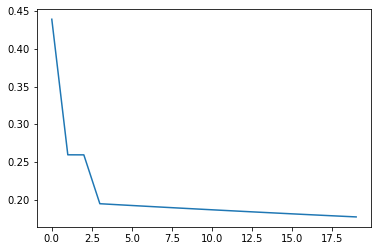

In [8]:
x_train, y_train, x_test_raw = Dataset_creation()

# Neural network construction
model = [784, 16, 8, 10]    #NN Dimensions:
                            #784 Vector
                            #16 Neuron in 1st hidden layer
                            #8 Neuron in 1st hidden layer
                            #10 Output classes

#Random parameters initialization
params = Initialize_params(model)

#Learning rate and epochs
lr = 0.1
epochs = 20
error = []

#Training
i = 0
while i <= epochs:
    params, output = Forward(params, x_train)
    params = BackPropagation(params, y_train, d=True)
    params = WeightAdjust(params, lr)
    error.append(mse(y_train, output))
    i += 1

#Plot errors vs epochs
print(f'MSE: {error.pop()}')
plt.plot(error)